In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import spectrum

In [2]:
FILE_PATH = "/Users/wyatt.petryshen/Documents/GitHub/Remote-Air-Quality-Station/WS/OutPut/apartment_log.txt"  

timestamps = []
temperature = []
humidity = []
pressure = []
gas = []

# -----------------------------
# Read file
# -----------------------------
with open(FILE_PATH, "r") as f:
    reader = csv.reader(f)

    header = next(reader)  # skip header

    for row in reader:
        # Skip runtime/comment lines
        if row[0].startswith("#"):
            continue

        timestamps.append(datetime.fromisoformat(row[0]))
        temperature.append(float(row[1]))
        humidity.append(float(row[2]))
        pressure.append(float(row[3]))
        gas.append(float(row[4]))


In [11]:
def annotate_min_max(ax, times, values, label):
    min_val = min(values)
    max_val = max(values)

    min_idx = values.index(min_val)
    max_idx = values.index(max_val)

    min_time = times[min_idx]
    max_time = times[max_idx]

    # Plot markers
    ax.scatter(min_time, min_val, zorder=5)
    ax.scatter(max_time, max_val, zorder=5)

    # Annotate text
    ax.annotate(
        f"Min {label}: {min_val}\n{min_time.strftime('%m-%d %H:%M')}",
        (min_time, min_val),
        xytext=(5, -20),
        textcoords="offset points",
        fontsize=9
    )

    ax.annotate(
        f"Max {label}: {max_val}\n{max_time.strftime('%m-%d %H:%M')}",
        (max_time, max_val),
        xytext=(5, 10),
        textcoords="offset points",
        fontsize=9
    )


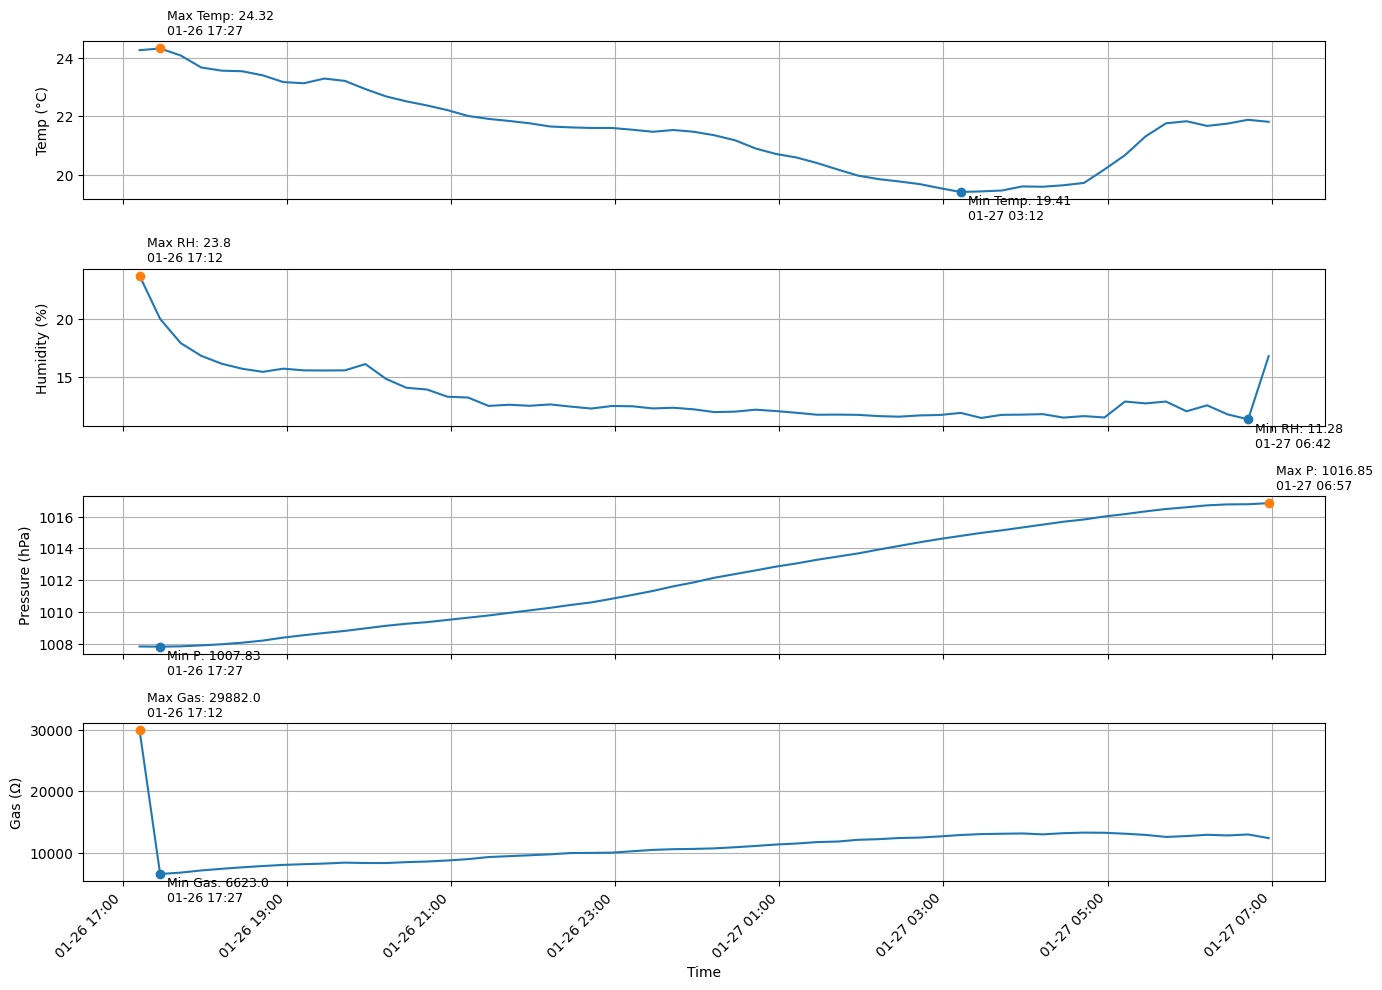

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Temperature
axs[0].plot(timestamps, temperature)
axs[0].set_ylabel("Temp (°C)")
axs[0].grid(True)
annotate_min_max(axs[0], timestamps, temperature, "Temp")

# Humidity
axs[1].plot(timestamps, humidity)
axs[1].set_ylabel("Humidity (%)")
axs[1].grid(True)
annotate_min_max(axs[1], timestamps, humidity, "RH")

# Pressure
axs[2].plot(timestamps, pressure)
axs[2].set_ylabel("Pressure (hPa)")
axs[2].grid(True)
annotate_min_max(axs[2], timestamps, pressure, "P")

# Gas resistance
axs[3].plot(timestamps, gas)
axs[3].set_ylabel("Gas (Ω)")
axs[3].grid(True)
annotate_min_max(axs[3], timestamps, gas, "Gas")

# ---- Time axis formatting ----
axs[3].set_xlabel("Time")
axs[3].xaxis.set_major_locator(mdates.HourLocator(interval=2))
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
plt.setp(axs[3].xaxis.get_majorticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [9]:
# Create spectrum class
psd = spectrum.mtm.MultiTapering(humidity, NW=2, k=3)
# Normal
x = psd.frequencies()
y = psd.psd
# Log 
lx = np.log10(x) # frequency
ly = np.log10(y) # power

/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_52267/2040879428.py:7: RuntimeWarning: divide by zero encountered in log10
  lx = np.log10(x) # frequency


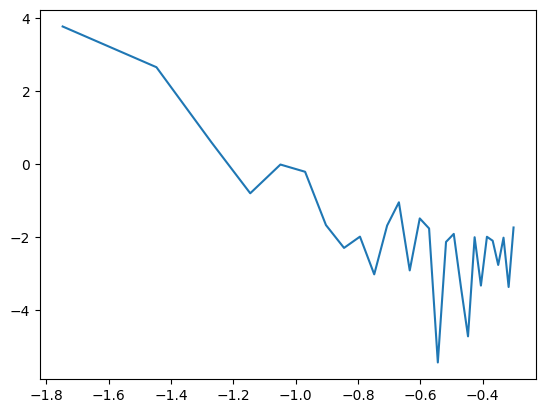

In [10]:
plt.plot(lx, ly)